<a href="https://colab.research.google.com/github/burton-its/image_classifier/blob/main/q2_ridge_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import RidgeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import Lasso
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
#read input data (labels read as float, need to be converted to int)
input_data = pd.read_csv('imgnorm01.csv', index_col = None)
input_data['f64'].astype(int)

0       1
1       0
2       1
3       0
4       1
       ..
2537    1
2538    0
2539    1
2540    0
2541    1
Name: f64, Length: 2542, dtype: int64

In [ ]:
#reponse set astype integer
y = input_data['f64'].astype(int)


In [ ]:
# features//dropping labels
input_data.drop('f64', axis = 1, inplace = True)

In [ ]:
input_data.columns

Index(['Unnamed: 0', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8',
       'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18',
       'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28',
       'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38',
       'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48',
       'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58',
       'f59', 'f60', 'f61', 'f62', 'f63'],
      dtype='object')

In [ ]:
input_data.drop('Unnamed: 0', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


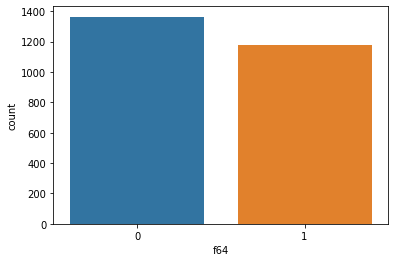

In [ ]:
sns.countplot(y)

In [ ]:
X = input_data

<function matplotlib.pyplot.show>

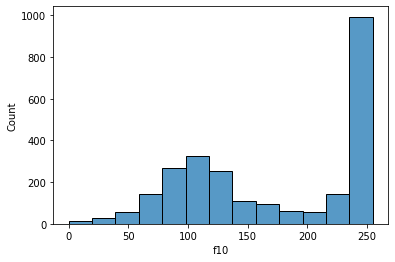

In [ ]:
#checking distribution of a random feature
sns.histplot(X['f10'])
plt.show

<function matplotlib.pyplot.show>

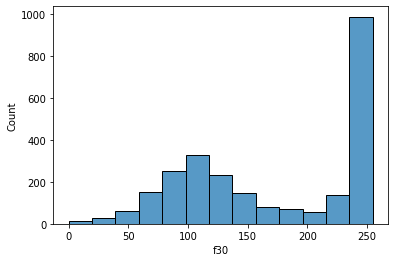

In [ ]:
#checking distribution of a random feature (2)
sns.histplot(X['f30'])
plt.show

In [ ]:
X.shape

(2542, 64)

In [ ]:
y.shape

(2542,)

In [ ]:
# generate feature matrix using np array
tmp = np.array(X)
X1 = tmp[:,0:65]

In [ ]:
Y1 = np.array(y)

In [ ]:
#split into shape for train/test
row,col = X.shape

In [ ]:
#80:20 train:test
TR = round(row*0.8)

In [ ]:
TT = row - TR

In [ ]:
# need help here
X1_train = X1[1:TR-1,:]
Y1_train = Y1[1:TR-1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


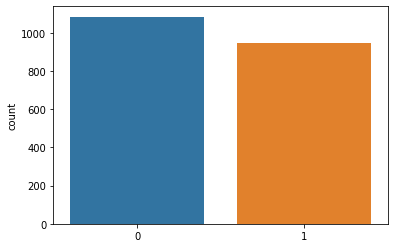

In [ ]:
sns.countplot(Y1_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


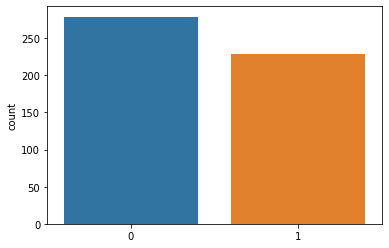

In [ ]:
X1_test = X1[TR:row,:]
y_test = Y1[TR:row]
sns.countplot(y_test)

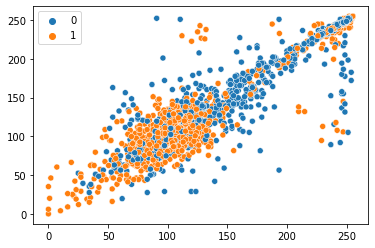

In [ ]:
#scatter plot of train features 10/30
scatx = X1_train[:,10]
scatx2 = X1_train[:,30]

sns.scatterplot(x = scatx, y = scatx2, hue = Y1_train)
plt.show()

<function matplotlib.pyplot.show>

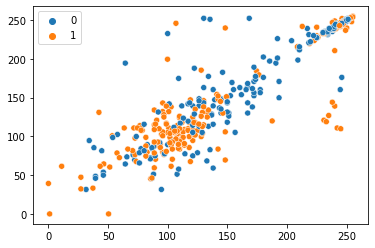

In [ ]:
#scatter of test features 10/30
scaty = X1_test[:,10]
scaty2 = X1_test[:,30]
sns.scatterplot(x = scaty, y = scaty2, hue = y_test)
plt.show

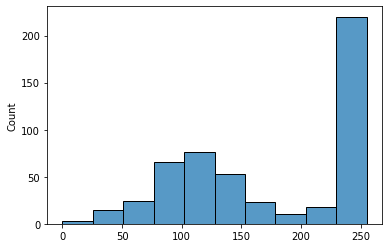

In [ ]:
sns.histplot(scaty)
plt.show()

In [ ]:
y.shape

(2542,)

In [ ]:
X_prime = X.to_numpy()
X_np = np.transpose(X_prime)
# X_prime.shape
X_np

array([[235.84980237, 143.27319588,  93.73517787, ..., 102.80632411,
        252.37113402, 243.91304348],
       [235.84980237, 131.44329897,  80.63241107, ..., 125.98814229,
        251.05670103, 243.91304348],
       [236.85770751, 120.92783505,  76.60079051, ..., 113.89328063,
        252.37113402, 244.92094862],
       ...,
       [238.87351779, 145.90206186,  86.6798419 , ..., 118.93280632,
        251.05670103, 242.90513834],
       [238.87351779, 136.70103093,  79.62450593, ..., 129.01185771,
        251.05670103, 243.91304348],
       [238.87351779, 106.46907216,  61.48221344, ..., 120.9486166 ,
        249.74226804, 243.91304348]])

In [ ]:
y_np = y.to_numpy()
y.shape

(2542,)

In [ ]:
#lasso regression 
lamda = 0.01
A1_y = np.matmul(y_np,X_prime) 
A1_x = np.linalg.inv(np.matmul(X_np, X_prime))

A1 = np.matmul(A1_y, A1_x)
S = np.where(A1 > 0, 1, -1)

In [ ]:
len(A1)

64

In [ ]:
S

array([-1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,
        1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1,
       -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1])

In [ ]:
AA = (np.matmul(y_np, X_prime)) - S *(lamda/2)

In [ ]:
AA_2 = np.linalg.inv(np.matmul(X_np, X_prime))

In [ ]:
AA_3 = np.matmul(AA,AA_2)
AA_3.shape

(64,)

In [ ]:
X1_test_t = np.transpose(X1_test)

In [ ]:
yy1 = np.matmul(AA_3, X1_test_t)

In [ ]:
yy2 = np.where(yy1 > 0, 1, 0)

In [ ]:
cc_testfin = confusion_matrix(y_test, yy2)

In [ ]:
print(metrics.precision_score(y_test, yy2))

0.4431137724550898


In [ ]:
print(metrics.recall_score(y_test, yy2))

0.9694323144104804


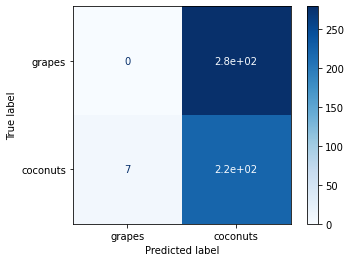

In [ ]:
labels = ['grapes', 'coconuts']
disp = ConfusionMatrixDisplay(confusion_matrix= cc_testfin, display_labels = labels )
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:

#library lasso
modellas = Lasso(alpha = 0.01, positive = True)
modellas.fit(X,y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=True, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
yhat_test_las = modellas.predict(X1_test)

In [ ]:
print('lasso score' , modellas.score(X1_test, yhat_test_las))

lasso score 1.0


In [ ]:
yhat2 = yhat_test_las.astype(int)

In [ ]:
CC_test2 = confusion_matrix(y_test, yhat2)

In [ ]:
CC_test2

array([[279,   0],
       [229,   0]])

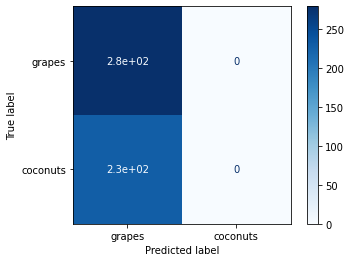

In [ ]:
labels = ['grapes', 'coconuts']
disp = ConfusionMatrixDisplay(confusion_matrix= CC_test2, display_labels = labels )
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
X1_train.shape

(2032, 64)

In [ ]:
X.shape

(2542, 64)

In [ ]:
y.shape

(2542,)

In [ ]:
X1_test.shape

(508, 64)

In [ ]:
Y1_train.shape

(2032,)

In [ ]:
#flatten is input layer
#dense has x neurons
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X1_train.shape[1:])),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 8,449
Trainable params: 8,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(
  X1_train,
  Y1_train,
  epochs=10
)

Epoch 1/10
64/64 [==============================] - 1s 1ms/step - loss: 20.2836 - accuracy: 0.5079
Epoch 2/10
64/64 [==============================] - 0s 2ms/step - loss: 4.6607 - accuracy: 0.5202
Epoch 3/10
64/64 [==============================] - 0s 1ms/step - loss: 5.1458 - accuracy: 0.5148
Epoch 4/10
64/64 [==============================] - 0s 1ms/step - loss: 5.4887 - accuracy: 0.5266
Epoch 5/10
64/64 [==============================] - 0s 1ms/step - loss: 8.1640 - accuracy: 0.5128
Epoch 6/10
64/64 [==============================] - 0s 1ms/step - loss: 3.1863 - accuracy: 0.5266
Epoch 7/10
64/64 [==============================] - 0s 1ms/step - loss: 4.8122 - accuracy: 0.5133
Epoch 8/10
64/64 [==============================] - 0s 2ms/step - loss: 3.1471 - accuracy: 0.5167
Epoch 9/10
64/64 [==============================] - 0s 1ms/step - loss: 4.3279 - accuracy: 0.5202
Epoch 10/10
64/64 [==============================] - 0s 2ms/step - loss: 2.6201 - accuracy: 0.5512


In [ ]:
test_loss, test_acc = model.evaluate(X1_test, y_test, verbose = 2)
print('\nTest accuracy:', test_acc)

16/16 - 0s - loss: 1.5823 - accuracy: 0.5571

Test accuracy: 0.5570865869522095


In [ ]:
predictions = model.predict(X1_test)

In [ ]:
predictions[1]

array([0.01436461], dtype=float32)

In [ ]:
np.argmax(predictions[1])
yhat3 = predictions.astype(int)


In [ ]:
#np filter where 0 = neg value / 1 = pos value
yhat3 = np.where(yhat3 > 0.5, 1, 0)

In [ ]:
cc_test_seqmodel = confusion_matrix(y_test, yhat3)
cc_test_seqmodel

array([[218,  61],
       [153,  76]])

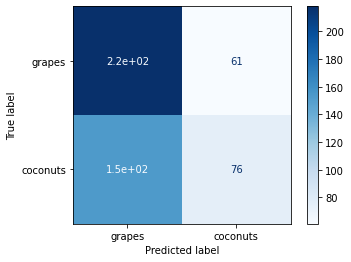

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix= cc_test_seqmodel, display_labels = labels )
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# yhatadd = np.reshape(yhat2, (len(yhat2)))
# yhattest = np.reshape(y_test, (len(y_test)))
print(metrics.precision_score(y_test, yhat3))

0.5547445255474452


In [ ]:
print(metrics.recall_score(y_test, yhat3 ))

0.3318777292576419


In [ ]:
AL["AL"] = pd.DataFrame(yhat3)
PL["PL"] = pd.DataFrame(y_test)
AL.head

<bound method NDFrame.head of      0  AL
0    0   0
1    0   0
2    0   0
3    1   1
4    0   0
..  ..  ..
503  0   0
504  0   0
505  0   0
506  0   0
507  0   0

[508 rows x 2 columns]>

In [ ]:
# lassocsv = pd.DataFrame(lassocsv)
lassocsvfin = pd.concat([AL, PL], axis = 1)
lassocsvfin = lassocsvfin.iloc[: , 1:]
lassocsvfin = lassocsvfin.drop(lassocsvfin.columns[[1]], axis=1)
lassocsvfin

,AL,PL
0,0,1
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
503,0,1
504,0,0
505,0,1
506,0,0


In [ ]:
CC_testlasso = confusion_matrix(lassocsvfin['AL'], lassocsvfin['PL'])

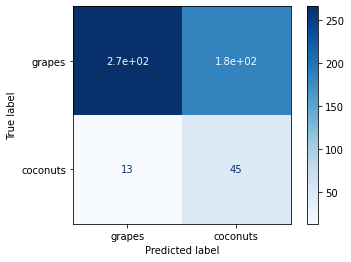

In [ ]:
labels = ['grapes', 'coconuts']
disp = ConfusionMatrixDisplay(confusion_matrix= CC_testlasso, display_labels = labels )
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
TN1 = CC_testlasso[1,1]
FP1 = CC_testlasso[1,0]
FN1 = CC_testlasso[0,1]
TP1 = CC_testlasso[0,0]

In [ ]:
FPFN1 = FP1+FN1
TPTN1 = TP1+TN1

In [ ]:
Precision1 = TP1/(TP1 + FP1)
print("Our_Precision_Score:",Precision1)

Our_Precision_Score: 0.953405017921147


In [ ]:
recall = TP1 / (TP1 + FN1)
print('recall: ' ,recall)

recall:  0.5911111111111111


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(lassocsvfin['AL'], lassocsvfin['PL'])

0.313588850174216

In [ ]:
lassocsvfin.to_csv('t2csv_labels.csv')

In [ ]:
yy2df = pd.DataFrame(yy2, columns= ["PL"])

In [ ]:
yy2df

,PL
0,1
1,1
2,0
3,1
4,1
...,...
503,1
504,1
505,1
506,1


In [ ]:
PL2 = pd.DataFrame(y_test, columns = ['AL'])
lassocsvlabels = pd.concat([PL2,yy2df], axis = 1)
lassocsvlabels

,AL,PL
0,1,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
503,1,1
504,0,1
505,1,1
506,0,1


In [ ]:
CC_testlasso9 = confusion_matrix(lassocsvlabels['AL'], lassocsvlabels['PL'])


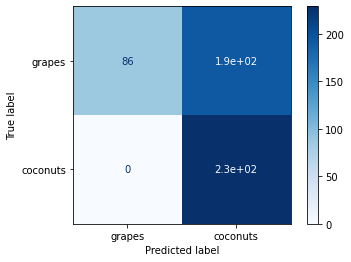

In [ ]:
labels = ['grapes', 'coconuts']
disp = ConfusionMatrixDisplay(confusion_matrix= CC_testlasso9, display_labels = labels )
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
lassocsvlabels.to_csv('t2csv_labels01_lasso.csv')